In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
df = pd.read_csv('data0.csv')

In [3]:
df.head()

,step,rate,time,speed,throttle,brake,steer,x,y,yaw,idx,ev,elat,eyaw,sp_x,sp_y,sp_yaw,sp_v,sp_curvature
0,14,0.05,0.05,0.0,1.000000,0.0,0.998584,-183.800217,80.200035,-1.570797,7,1.534826,2.46375,-0.003329,-181.336481,80.191602,-1.574125,1.534826,0.0
1,15,0.05,0.10,0.0,0.880874,0.0,0.998584,-183.800217,80.200035,-1.570797,7,1.534826,2.46375,-0.003329,-181.336481,80.191602,-1.574125,1.534826,0.0
2,16,0.05,0.15,0.0,0.915333,0.0,0.998584,-183.800217,80.200035,-1.570797,7,1.534826,2.46375,-0.003329,-181.336481,80.191602,-1.574125,1.534826,0.0
3,17,0.05,0.20,0.0,0.949791,0.0,0.998584,-183.800217,80.200035,-1.570797,7,1.534826,2.46375,-0.003329,-181.336481,80.191602,-1.574125,1.534826,0.0
4,18,0.05,0.25,0.0,0.984250,0.0,0.998584,-183.800217,80.200035,-1.570797,7,1.534826,2.46375,-0.003329,-181.336481,80.191602,-1.574125,1.534826,0.0


In [4]:
def mae(vd, v):
    return np.mean(np.abs(vd - v))
def mse(vd, v):
    return np.mean((vd - v)**2)

In [5]:
t = df['time'].values
v = df['speed'].values
v_desired = df['sp_v'].values
throttle = df['throttle'].values
brake = df['brake'].values
steer = df['steer'].values
x = df['x'].values
y = df['y'].values
yaw = df['yaw'].values
elat = df['elat'].values
eyaw = df['eyaw'].values
ev = df['ev'].values

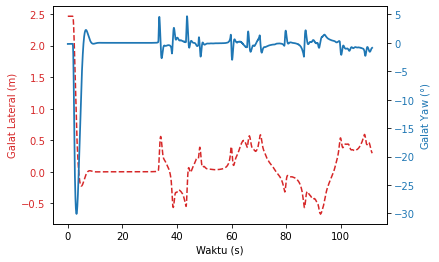

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Waktu (s)')
ax1.set_ylabel('Galat Lateral (m)', color=color)
ax1.plot(t-t[0], elat, color=color, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel(r'Galat Yaw $(\degree)$', color=color)  # we already handled the x-label with ax1
ax2.plot(t-t[0],  eyaw*180/np.pi, color=color, linewidth=1.75)
ax2.tick_params(axis='y', labelcolor=color)
fig.savefig('img/lateral', dpi=600, transparent=True)
plt.show()

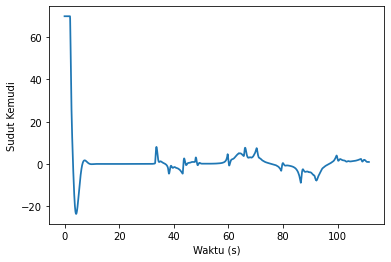

In [7]:
conv_rad_to_steer = 180.0 / 70.0 / np.pi
steer_rad = steer / conv_rad_to_steer
steer_deg = steer_rad * 180. / np.pi

plt.plot(t-t[0], steer_deg,linewidth=1.75)
plt.xlabel('Waktu (s)')
plt.ylabel('Sudut Kemudi')
fig.savefig('img/setir', dpi=500, transparent=True)
plt.show()

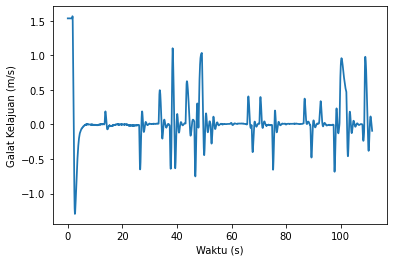

In [8]:
plt.plot(t-t[0],  ev, linewidth=1.75)
plt.xlabel('Waktu (s)')
plt.ylabel('Galat Kelajuan (m/s)')
fig.savefig('img/longitudinal', dpi=500, transparent=True)
plt.show()

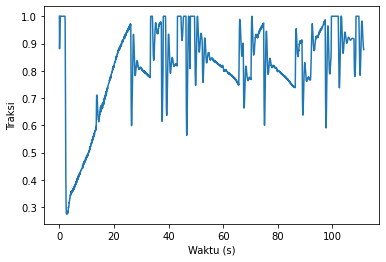

In [9]:
plt.plot(t-t[0], throttle)
plt.xlabel('Waktu (s)')
plt.ylabel('Traksi')
fig.savefig('img/traksi', dpi=500, transparent=True)
plt.show()

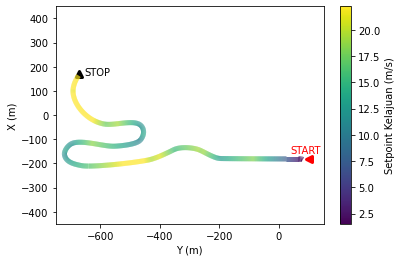

In [10]:
points = np.array([y, x]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

norm = plt.Normalize(v_desired.min(), v_desired.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
lc.set_array(v_desired)
lc.set_linewidth(5)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs, label='Setpoint Kelajuan (m/s)')

scl = 0.1
axs.scatter(y[0]*1.25, x[0], marker='<', linewidth=3, color='red')
axs.text(y[0]*0.5, x[0]*0.85, 'START', color='red', fontsize=10)
axs.scatter(y[-1], x[-1]*1.05, marker='^', linewidth=3, color='black')
axs.text(y[-1] + 20, x[-1], 'STOP', color='black', fontsize=10)
#axs.set_xlim(y.min() - scl*(y.max() - y.min()), y.max() + scl*(y.max() - y.min()))
#axs.set_ylim(x.min() - scl*(x.max() - x.min()), x.max() + scl*(x.max() - x.min()))
axs.set_xlim(-750,150)
axs.set_ylim(-450,450)
axs.set_xlabel('Y (m)')
axs.set_ylabel('X (m)')
fig.savefig('img/map', dpi=600, transparent=True)
plt.show()

In [11]:
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

In [12]:
print("root-mean-squared")
print('e_lat: {} m'.format(rms(elat)))
print('e_yaw: {} degree'.format(rms(eyaw*180./np.pi)))
print('e_v: {} m/s'.format(rms(ev)))

root-mean-squared
e_lat: 0.4644186613950538 m
e_yaw: 3.6960306991031806 degree
e_v: 0.32320977404275003 m/s
